In [1]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
import keras
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
Emotions= pd.read_csv('/kaggle/input/resampled-emotion/resampled_dataset.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,labels
0,-343.231146,37.558866,-0.372788,18.284779,3.074995,1.137900,1.668783,-6.958856,-11.183498,3.278659,...,1.737234,3.007987,-1.915921,-3.994851,-4.255999,0.977330,0.011549,1.054105,7.374246,female_fear
1,-391.141876,160.146866,-0.342277,40.565716,-9.892632,9.550532,-16.311275,2.301219,-10.459843,-2.293373,...,-2.260067,1.354825,-0.785108,1.379187,0.959163,0.254572,-0.170855,-0.175107,4.029863,male_happy
2,-440.704926,138.910446,-4.278396,6.812053,-18.034500,15.116300,-5.863420,-30.900389,-3.071321,-8.341875,...,3.016886,-0.324189,0.743461,3.266315,3.503980,8.839525,6.153041,4.439191,5.262685,female_disgust
3,-487.731232,138.616272,-2.798971,78.576241,-11.810479,41.155384,-24.424423,20.966124,-11.655171,0.376067,...,-4.225821,4.311293,-1.328754,3.346492,-2.652166,1.676025,-0.555439,-0.953365,0.975879,female_fear
4,-244.187909,52.025431,33.337002,25.946119,13.122968,1.960917,-8.086429,-7.554051,-2.736495,-3.353773,...,0.823382,0.124944,0.075287,0.831285,0.659253,1.599007,1.563065,1.563780,1.677120,male_neutral


In [3]:
X = Emotions.drop('labels',axis = 1)
Y = Emotions['labels']

In [4]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [5]:
# since it is a multiclass classifier, i will perform onehotencoding
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,shuffle = True)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((49302, 40), (49302, 14), (12326, 40), (12326, 14))

In [7]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((49302, 40), (49302, 14), (12326, 40), (12326, 14))

In [8]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Dense,AveragePooling1D,Dropout,add,BatchNormalization,LSTM,Flatten,MaxPooling1D,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax
from keras.activations import relu, softmax
from sklearn.metrics import confusion_matrix,classification_report

In [9]:

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((49302, 40, 1), (49302, 14), (12326, 40, 1), (12326, 14))

In [10]:
my_model=Sequential()
my_model.add(Conv1D(256, kernel_size=7, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())


my_model.add(Conv1D(64, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.5))
        
my_model.add(Flatten())
my_model.add(Dense(units=32, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(units=14, activation='softmax'))
my_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 256)           2048      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 256)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 20, 256)          1024      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 128)           229504    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 128)          0         
 1D)                                                             
                                                        

In [11]:
history = my_model.fit(x_traincnn, y_train, batch_size=32, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
1541/1541 [==============================] - 24s 9ms/step - loss: 1.9281 - accuracy: 0.3479 - val_loss: 1.2614 - val_accuracy: 0.5372
Epoch 2/100
1541/1541 [==============================] - 13s 9ms/step - loss: 1.4234 - accuracy: 0.4826 - val_loss: 1.1799 - val_accuracy: 0.5621
Epoch 3/100
1541/1541 [==============================] - 14s 9ms/step - loss: 1.2769 - accuracy: 0.5249 - val_loss: 1.0719 - val_accuracy: 0.5926
Epoch 4/100
1541/1541 [==============================] - 13s 9ms/step - loss: 1.1859 - accuracy: 0.5584 - val_loss: 1.0006 - val_accuracy: 0.6236
Epoch 5/100
1541/1541 [==============================] - 14s 9ms/step - loss: 1.1063 - accuracy: 0.5866 - val_loss: 0.9421 - val_accuracy: 0.6494
Epoch 6/100
1541/1541 [==============================] - 13s 9ms/step - loss: 1.0492 - accuracy: 0.6095 - val_loss: 0.9156 - val_accuracy: 0.6585
Epoch 7/100
1541/1541 [==============================] - 14s 9ms/step - loss: 0.9899 - accuracy: 0.6321 - val_loss: 0.8590 -

In [12]:
print("Accuracy of our model  : " , round(my_model.evaluate(x_testcnn,y_test)[1],2)*100 , "%")

386/386 [==============================] - 1s 3ms/step - loss: 0.8326 - accuracy: 0.8524
Accuracy of our model  :  85.0 %


In [13]:
model_name = 'emotion_model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)   # adds file in folder
my_model.save(model_path)
print('Save model and weights at %s' % model_path)
model_json = my_model.to_json()
with open('model_json.json', 'w') as json_file:
    json_file.write(model_json)

Save model and weights at /kaggle/working/saved_models/emotion_model.h5


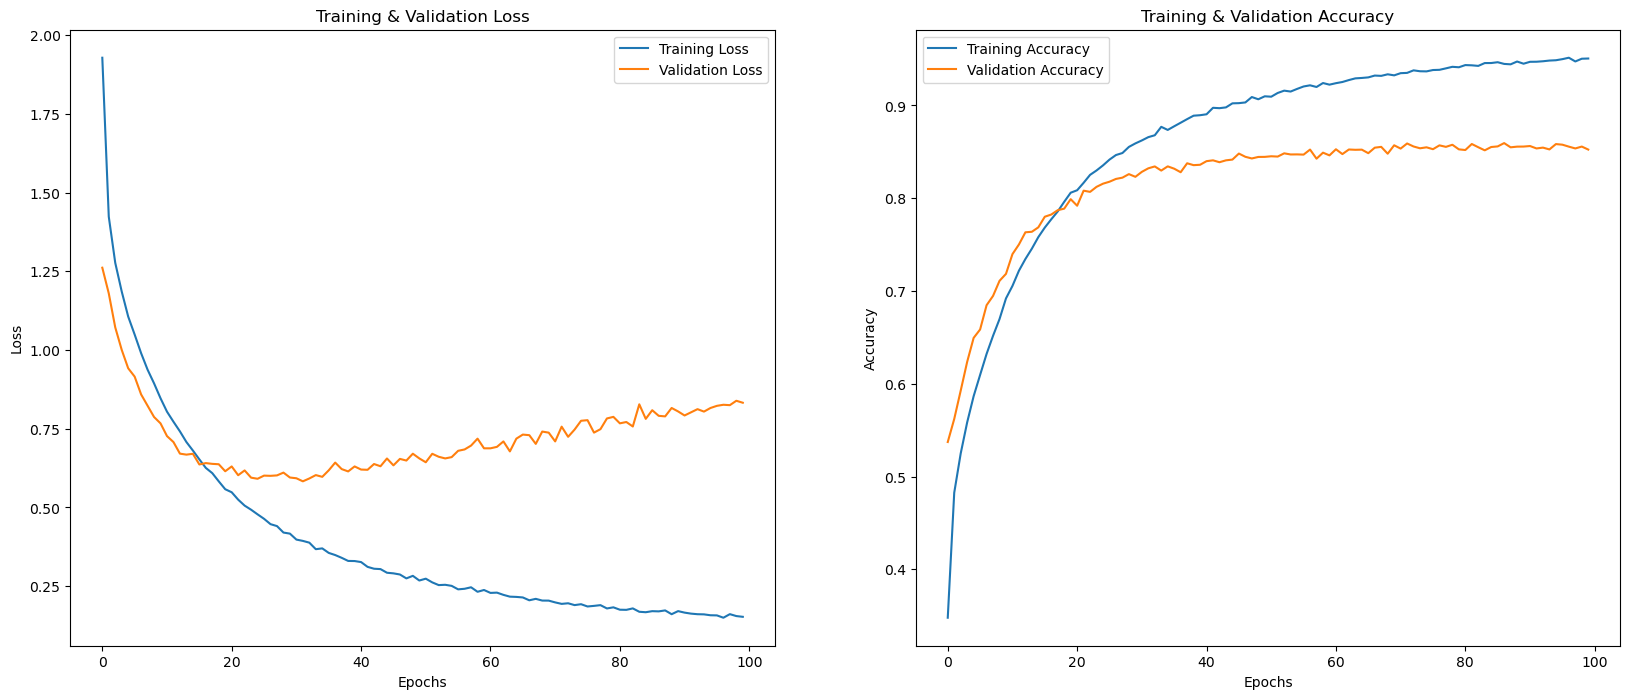

In [14]:
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,8)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.show()

In [15]:
# predicting on test data.
pred_test = my_model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

386/386 [==============================] - 1s 3ms/step


In [16]:
df = pd.DataFrame(columns=['PredictedLabels', 'ActualLabels'])
df['PredictedLabels'] = y_pred.flatten()
df['ActualLabels'] = y_test.flatten()

In [17]:
df

,PredictedLabels,ActualLabels
0,female_angry,female_angry
1,female_fear,female_fear
2,male_surprise,male_surprise
3,male_angry,male_angry
4,male_angry,male_angry
...,...,...
12321,male_neutral,male_neutral
12322,female_neutral,female_neutral
12323,female_sad,female_sad
12324,male_surprise,male_surprise


In [18]:
df.to_csv('Predictions.csv', index = False)

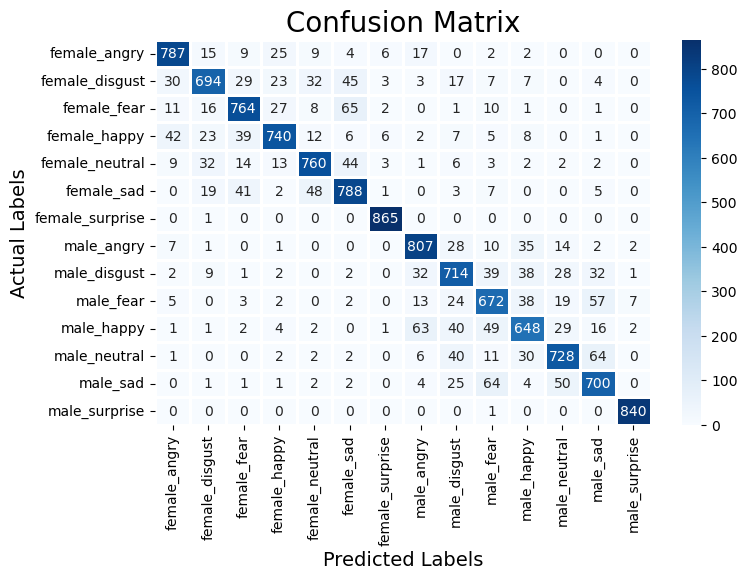

In [19]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [20]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   female_angry       0.88      0.90      0.89       876
 female_disgust       0.85      0.78      0.81       894
    female_fear       0.85      0.84      0.84       906
   female_happy       0.88      0.83      0.85       891
 female_neutral       0.87      0.85      0.86       891
     female_sad       0.82      0.86      0.84       914
female_surprise       0.98      1.00      0.99       866
     male_angry       0.85      0.89      0.87       907
   male_disgust       0.79      0.79      0.79       900
      male_fear       0.76      0.80      0.78       842
     male_happy       0.80      0.76      0.78       858
   male_neutral       0.84      0.82      0.83       886
       male_sad       0.79      0.82      0.81       854
  male_surprise       0.99      1.00      0.99       841

       accuracy                           0.85     12326
      macro avg       0.85      0.85      0.85     12326
   weighted avg       0.85   

In [21]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.ActualLabels.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [22]:
modidf['predictedvalues'] = modidf.PredictedLabels.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 
# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))

0.8594028882037968


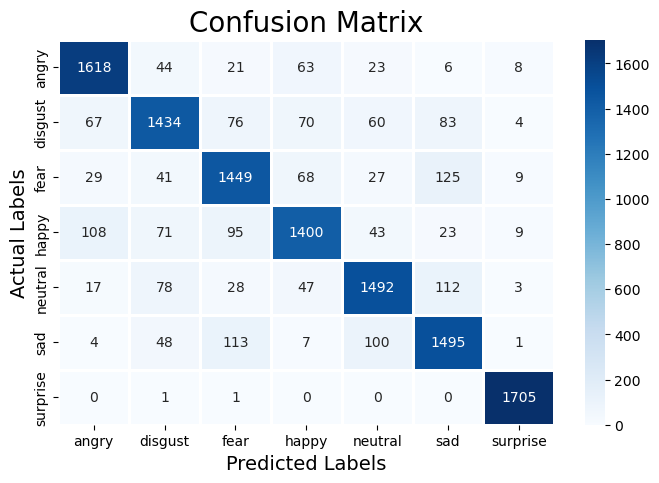

In [23]:
cm = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
plt.figure(figsize = (8,5))
x= pd.DataFrame(cm,  columns=(classes), index=(classes))
sns.heatmap(x, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [24]:
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.88      0.91      0.89      1783
     disgust       0.84      0.80      0.82      1794
        fear       0.81      0.83      0.82      1748
       happy       0.85      0.80      0.82      1749
     neutral       0.86      0.84      0.85      1777
         sad       0.81      0.85      0.83      1768
    surprise       0.98      1.00      0.99      1707

    accuracy                           0.86     12326
   macro avg       0.86      0.86      0.86     12326
weighted avg       0.86      0.86      0.86     12326

